# Logistic Regression
In this lab session we will implement logistic regression to classify gender given the height and weight.

In [1]:
# Useful starting lines
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(sub_sample=True, add_outlier=False):
    """Load data and convert it to the metric system."""
    path_dataset = "Data/height_weight_genders.csv"
    data = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[1, 2])
    height = np.array(data[:, 0])
    weight = np.array(data[:, 1])
    gender = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[0],
        converters={0: lambda x: 0 if "Male" in x else 1})
    gender = np.array(gender)
    # Convert to cm, kg
    height *= 2.5
    weight *= 0.454
    return height, weight, gender


def sample_data(x, y, size_samples, seed=0):
    """sample from dataset."""
    np.random.seed(seed)
    num_observations = y.shape[0]
    random_permuted_indices = np.random.permutation(num_observations)
    x = x[random_permuted_indices]
    y = y[random_permuted_indices]
    return x[:size_samples], y[:size_samples]


### Question 1
Load the data (using the provided function `load_data()`), create the feature matrix `X` and the class vector `C`, and sample 200 datapoints (using the provided function `sample_data()`). The final output should be the 200x3 feature matrix `x` and the corresponding class vector `c`.

In [3]:
# load data.
H, W, G = load_data()

# build matrix X and vector C.
X = np.zeros((len(G),3))
X[:,0] = np.ones(H.shape)
X[:,1] = H
X[:,2] = W
C = G

# Sample 200 datapoints from X and C into x and c
x, c = sample_data(X, C, 200, seed=1,)

### Question 2
Plot the sampled data points in the space (height, weight) with two different colors for each gender (use the fucntion `plt.scatter`)

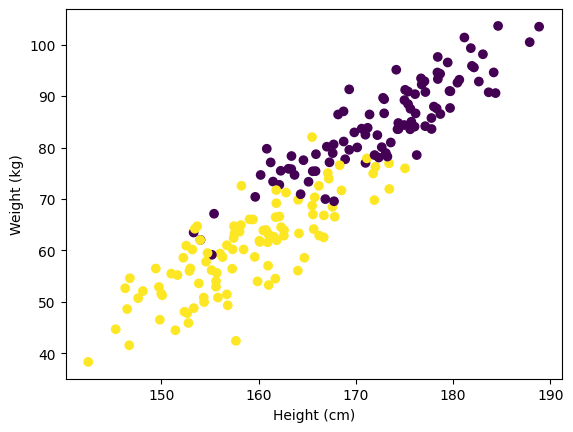

In [4]:
plt.figure()
plt.scatter(x[:,1], x[:,2], c=c)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.show()

### Question 3
Define the function `sigmoid(t)` that takes the input and applies the sigmoid function to it <br>
$h(t) = \frac{1}{1+e^{-t}}$

In [5]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1 / (1 + np.exp(-t))

### Question 4
Define the function `calculate_loss(x, c, theta)` that calculates the logistic loss function
$$J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} \left[c^{(i)}log\left(h_\theta(x^{(i)})\right) + \left(1-c^{(i)}\right)log\left(1-h_\theta(x^{(i)})\right)\right]$$

In [6]:
def calculate_loss(x, c, theta):
    """Compute the cost by negative log likelihood."""
    theta = np.array(theta)
    N = len(c)
    loss = 0
    for i in range(N):
        hi = sigmoid(theta @ x[i])
        one_hi = sigmoid(-theta @ x[i])
        loss += -(c[i] * np.log(hi) + (1 - c[i]) * np.log(one_hi)) / N
    
    return loss

In [7]:
print(calculate_loss(x, c, [1., .1, 2]))

91.54854015709635


### Question 5
Define the function `calculate_gradient(x, c, theta)` that calculates the gradient of the logistic loss
$$\frac{\partial J}{\partial \theta_j} = \frac{1}{N}\sum_{i=1}^{N} \left(h_\theta(x^{(i)}-c^{(i)}\right)x_{j}^{(i)}$$
or in matrix form: 
$$\nabla_\theta J = \frac{1}{N} X^T \cdot \left(h\left(X \cdot \theta \right) - C\right)$$

In [8]:
def calculate_gradient(x, c, theta):
    """compute the gradient of loss."""
    theta = np.array(theta)
    N = len(c)
    h = sigmoid(x @ theta)
    gradient = (x.T @ (h - c)) / N

    return gradient

In [9]:
print(calculate_gradient(x,c,[0, 0, 0]))

[-0.01        1.7956369   5.22507255]


### Question 6
Define the function `gradient_descent(x, c, theta, alpha)` with `alpha` the learning rate, which does one step of gradient descent, return the loss and updated `theta`:
$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j}j(\theta)$$
or in matrix form:
$$\theta := \theta - \alpha\nabla_\theta J$$

In [10]:
def learning_by_gradient_descent(x, c, theta, alpha):
    """
    Does one step of gradient descent using logistic regression.
    Return the loss and the updated theta.
    """
    loss = calculate_loss(x, c, theta)
    gradient = calculate_gradient(x, c, theta)
    theta = theta - alpha * gradient
    
    return loss, theta

### Question 7
Using the function `learning_by_gradient_descent()`, implement the logistic regression on the data, and visualizes the training process (loss vs. time) to check convergence.

In [11]:
num_t = 1000
learning_rate = 0.001

losses = np.zeros(num_t)
theta = np.zeros(3)

for t in range(num_t):
    loss, theta = learning_by_gradient_descent(x, c, theta, learning_rate)
    losses[t] = loss
    if t % 100 == 0:
        print("time, loss, theta:", t, loss, theta)

time, loss, theta: 0 0.693147180559948 [ 1.00000000e-05 -1.79563690e-03 -5.22507255e-03]
time, loss, theta: 100 1.5852072892450657 [ 0.00263743  0.10900608 -0.37311283]
time, loss, theta: 200 0.2066284165698709 [ 0.0038706   0.20625273 -0.4696656 ]
time, loss, theta: 300 0.20651093418786307 [ 0.00380126  0.20491301 -0.46654008]
time, loss, theta: 400 0.2064119748095996 [ 0.00373374  0.203645   -0.46366493]
time, loss, theta: 500 0.2063276939277541 [ 0.00366813  0.2024749  -0.46101166]
time, loss, theta: 600 0.20625610430911923 [ 0.0036043   0.20139658 -0.45856641]
time, loss, theta: 700 0.2061954460596172 [ 0.00354213  0.2004041  -0.45631567]
time, loss, theta: 800 0.20614416969299731 [ 0.00348152  0.19949168 -0.45424639]
time, loss, theta: 900 0.2061009183918268 [ 0.00342236  0.19865378 -0.45234603]


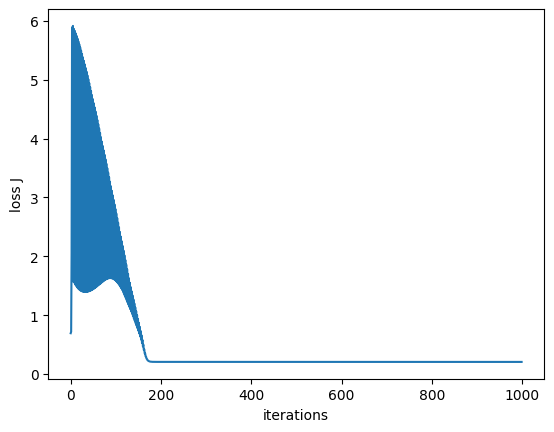

In [12]:
plt.figure()
plt.plot(losses)

plt.xlabel('iterations')
plt.ylabel('loss J')

plt.show()

### Question 8
Plot the line $h_\theta = 1/2$ on the same plot as the datapoints (see question 2).

In [13]:
hpredict = np.linspace(140, 190, 100)
wpredict = -(theta[0] + theta[1] * hpredict) / theta[2]

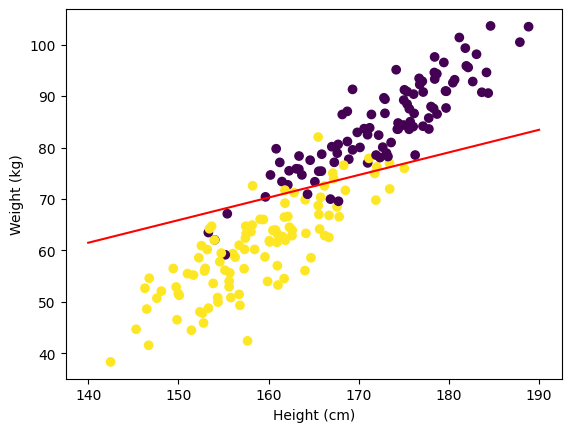

In [14]:
plt.figure()
plt.scatter(x[:,1], x[:,2], c=c)
plt.plot(hpredict, wpredict, 'r-')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.show()